In [28]:
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

# Hw 3 Problem 5

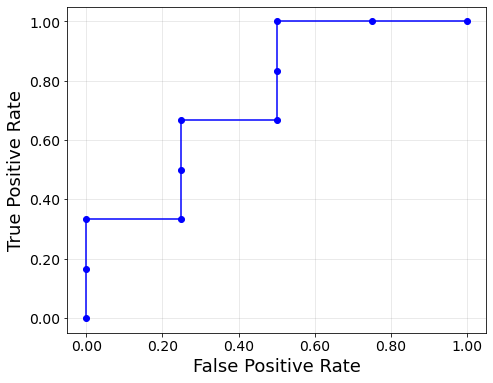

In [27]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))

ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)

plt.plot([0.00, 0.00, 0.00, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 1],[0.00, 1/6, 2/6, 2/6, 0.5, 4/6, 4/6, 5/6, 1.00, 1.00, 1.0], marker = 'o', color = "blue")

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW3/Problem 5a.png", dpi=300, bbox_inches='tight')


# Hw 3 Part 2

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
D2z = pd.read_csv("/Users/elvis/Downloads/hw3-1/data/D2z.txt", sep = " ", header= None)

In [32]:
D2z

,0,1,2
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [42]:
Test_Points = pd.DataFrame([[i, j] for i in np.arange(-2,2.1,0.1) for j in np.arange(-2,2.1,0.1)])

In [50]:
oneNN = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
oneNN.fit(D2z[[0,1]], D2z[[2]])

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [58]:
Test_Points_labels = oneNN.predict(Test_Points[[0,1]])

In [63]:
Test_Points[2] = Test_Points_labels

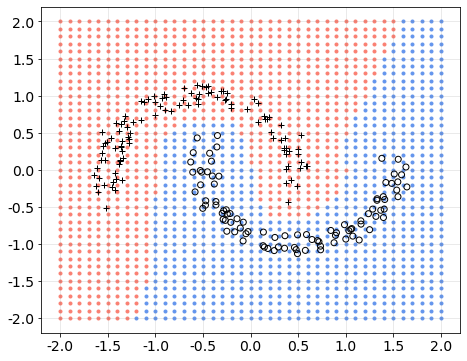

In [78]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))

#ax.set_xlabel('False Positive Rate', fontsize=18)
#ax.set_ylabel('True Positive Rate', fontsize=18)

plt.scatter(Test_Points.loc[Test_Points[2] == 0][0], Test_Points.loc[Test_Points[2] == 0][1], marker = '.', c = 'cornflowerblue')
plt.scatter(Test_Points.loc[Test_Points[2] == 1][0], Test_Points.loc[Test_Points[2] == 1][1], marker = '.', c = 'salmon')
plt.scatter(D2z.loc[D2z[2] == 0][0], D2z.loc[D2z[2] == 0][1], marker= 'o', facecolor='none', edgecolors='black')
plt.scatter(D2z.loc[D2z[2] == 1][0], D2z.loc[D2z[2] == 1][1], marker= '+', color ='black', linewidths=1)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW3/Problem 2-1.png", dpi=300, bbox_inches='tight')

# Part 2 - Programming

In [222]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [79]:
email_data = pd.read_csv("/Users/elvis/Downloads/hw3-1/data/emails.csv")

In [83]:
single_train = email_data[:4000]
single_test = email_data[4000:]

Fold_1 = email_data[:1000]
Fold_2 = email_data[1000:2000]
Fold_3 = email_data[2000:3000]
Fold_4 = email_data[3000:4000]
Fold_5 = email_data[4000:5000]

### 1NN

In [225]:
accuracies_fold = [0,0,0,0,0]
precisions_fold = [0,0,0,0,0]
recalls_fold = [0,0,0,0,0]
for i in range(0,5):
    email_oneNN = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
    Fold_data = [Fold_1.drop(columns= "Email No."), Fold_2.drop(columns= "Email No."), 
                 Fold_3.drop(columns= "Email No."), Fold_4.drop(columns= "Email No."), Fold_5.drop(columns= "Email No.")]
    test_emails = pd.DataFrame(Fold_data[i])
    Fold_data.pop(i)
    train_emails = pd.DataFrame()
    for j in Fold_data:
        train_emails = pd.concat((train_emails,j))
    email_oneNN.fit(train_emails.drop(columns='Prediction'), train_emails[['Prediction']])
    test_emails_predictions = email_oneNN.predict(test_emails.drop(columns='Prediction'))
    accuracies_fold[i] = np.round(accuracy_score(test_emails['Prediction'], test_emails_predictions), 3)
    precisions_fold[i] = np.round(precision_score(test_emails['Prediction'], test_emails_predictions), 3)
    recalls_fold[i] = np.round(recall_score(test_emails['Prediction'], test_emails_predictions), 3)

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1

In [226]:
accuracies_fold, precisions_fold, recalls_fold

([0.825, 0.853, 0.862, 0.851, 0.775],
 [0.654, 0.686, 0.721, 0.716, 0.606],
 [0.818, 0.866, 0.838, 0.816, 0.758])

### 5NN

In [220]:
accuracies_k = [0,0,0,0,0]
count = 0
for k in [1,3,5,7,10]:
    overall_test = []
    overall_pred = []
    for i in range(0,5):
        email_oneNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
        Fold_data = [Fold_1.drop(columns= "Email No."), Fold_2.drop(columns= "Email No."), 
                     Fold_3.drop(columns= "Email No."), Fold_4.drop(columns= "Email No."), Fold_5.drop(columns= "Email No.")]
        test_emails = pd.DataFrame(Fold_data[i])
        Fold_data.pop(i)
        train_emails = pd.DataFrame()
        for j in Fold_data:
            train_emails = pd.concat((train_emails,j))
        email_oneNN.fit(train_emails.drop(columns='Prediction'), train_emails[['Prediction']])
        test_emails_predictions = email_oneNN.predict(test_emails.drop(columns='Prediction'))
        overall_test = np.concatenate((overall_test, test_emails['Prediction'].to_numpy()))
        overall_pred = np.concatenate((overall_pred, test_emails_predictions))
    accuracies_k[count] = accuracy_score(overall_test, overall_pred)
    count = count + 1

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1

In [221]:
accuracies_k

[0.8332, 0.8422, 0.8408, 0.8462, 0.8556]

/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/3257121821.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('kNN 5-Fold Cross Valdidation', Fontsize = 24)


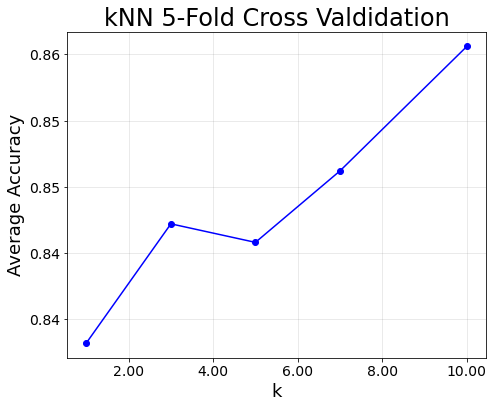

In [230]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))

ax.set_xlabel('k', fontsize=18)
ax.set_ylabel('Average Accuracy', fontsize=18)
ax.set_title('kNN 5-Fold Cross Valdidation', Fontsize = 24)

plt.plot([1,3,5,7,10],accuracies_k, marker = 'o', color = "blue")

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW3/Problem 2-4.png", dpi=300, bbox_inches='tight')

### Logistic Regression

In [369]:
def sigmoid(x):
    ans = 1/(1+np.exp(-x))
    return(ans)

In [379]:
learning_rate = 0.01

In [380]:
accuracies_fold = [0,0,0,0,0]
precisions_fold = [0,0,0,0,0]
recalls_fold = [0,0,0,0,0]
for i in range(0,5):
    theta = np.zeros(3000).reshape(3000,1)

    Fold_data = [Fold_1.drop(columns= "Email No."), Fold_2.drop(columns= "Email No."), 
                 Fold_3.drop(columns= "Email No."), Fold_4.drop(columns= "Email No."), Fold_5.drop(columns= "Email No.")]
    test_emails = pd.DataFrame(Fold_data[i])
    Fold_data.pop(i)
    train_emails = pd.DataFrame()
    for j in Fold_data:
        train_emails = pd.concat((train_emails,j))

    for l in range(0,1000):
        theta = (theta.reshape(3000,1) - learning_rate*((sigmoid(theta.T@train_emails.drop(columns='Prediction').to_numpy().T).reshape(4000,1) - train_emails[['Prediction']].to_numpy()).T@train_emails.drop(columns='Prediction').to_numpy()).T)

    
    test_emails_predictions = sigmoid(theta.T@test_emails.drop(columns='Prediction').to_numpy().T)

    test_emails_predictions = np.round(test_emails_predictions, 0)

    accuracies_fold[i] = np.round(accuracy_score(test_emails['Prediction'], test_emails_predictions.reshape(1000,1)), 3)
    precisions_fold[i] = np.round(precision_score(test_emails['Prediction'], test_emails_predictions.reshape(1000,1)), 3)
    recalls_fold[i] = np.round(recall_score(test_emails['Prediction'], test_emails_predictions.reshape(1000,1)), 3)

    print(i)

/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/1304349285.py:2: RuntimeWarning: overflow encountered in exp
  ans = 1/(1+np.exp(-x))


0


/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/1304349285.py:2: RuntimeWarning: overflow encountered in exp
  ans = 1/(1+np.exp(-x))


1


/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/1304349285.py:2: RuntimeWarning: overflow encountered in exp
  ans = 1/(1+np.exp(-x))


2


/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/1304349285.py:2: RuntimeWarning: overflow encountered in exp
  ans = 1/(1+np.exp(-x))


3


/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/1304349285.py:2: RuntimeWarning: overflow encountered in exp
  ans = 1/(1+np.exp(-x))


4


In [381]:
accuracies_fold, precisions_fold, recalls_fol

([0.91, 0.897, 0.883, 0.877, 0.85],
 [0.885, 0.792, 0.896, 0.838, 0.781],
 [0.786, 0.852, 0.665, 0.721, 0.709])

### ROC Curve

In [386]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [438]:
email_oneNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
Fold_data = [Fold_1.drop(columns= "Email No."), Fold_2.drop(columns= "Email No."), 
                     Fold_3.drop(columns= "Email No."), Fold_4.drop(columns= "Email No."), Fold_5.drop(columns= "Email No.")]
test_emails = pd.DataFrame(Fold_data[2])
Fold_data.pop(2)
train_emails = pd.DataFrame()
for j in Fold_data:
    train_emails = pd.concat((train_emails,j))

email_oneNN.fit(train_emails.drop(columns='Prediction'), train_emails[['Prediction']])
fiveNN_emails_predictions = email_oneNN.predict_proba(test_emails.drop(columns='Prediction'))

clf = LogisticRegression(random_state=0).fit(train_emails.drop(columns='Prediction'), train_emails[['Prediction']])
logReg_emails_predictions = clf.predict_proba(test_emails.drop(columns='Prediction'))

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

In [439]:
fiveNN_fpr, fiveNN_tpr, fiveNN_thresholds = metrics.roc_curve(test_emails['Prediction'], fiveNN_emails_predictions.T[1], pos_label=1)
metrics.auc(fiveNN_fpr, fiveNN_tpr)

0.9396539853647021

In [442]:
logReg_fpr, logReg_tpr, logReg_thresholds = metrics.roc_curve(test_emails['Prediction'], logReg_emails_predictions.T[1], pos_label=1)
metrics.auc(logReg_fpr, logReg_tpr)

0.9891563065544102

/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_55078/2993297757.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('False Positive Rate', Fontsize = 18)


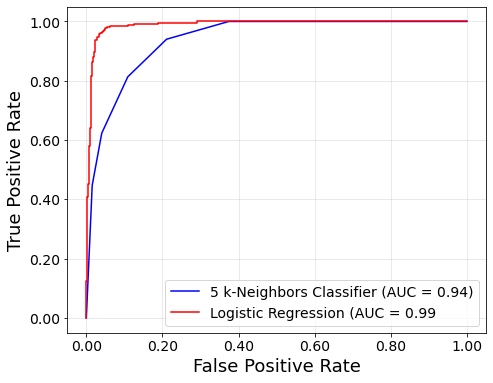

In [447]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))

ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_xlabel('False Positive Rate', Fontsize = 18)

plt.plot(fiveNN_fpr,fiveNN_tpr, color = "blue", label = '5 k-Neighbors Classifier (AUC = 0.94)')
plt.plot(logReg_fpr,logReg_tpr, color = "red", label = 'Logistic Regression (AUC = 0.99')


plt.legend(fontsize = 14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW3/Problem 2-5.png", dpi=300, bbox_inches='tight')